# ECE 4950 Assignment 6 

## Coding (Support Vector Machines): Digit classification using SVM 

We consider hand written digit recognition, MNIST. Please visit http://yann.lecun.com/exdb/mnist/ for more information about the original MNIST dataset.

In this competition, you will be given images of hand written digits. Each image is grayscale, and 28 by 28 pixels. Your goal is to design a classifier for this problem (output digits from 0 to 9).

Make sure you have installed the package scikit-image:

``
    pip3 install scikit-image
``

or 


``
    conda install scikit-image
``

You can use the following script to load data.

In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
data_path = "./mnist.mat"
data_raw = loadmat(data_path)
images = data_raw['data'].T
label = data_raw['label'][0]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also provided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

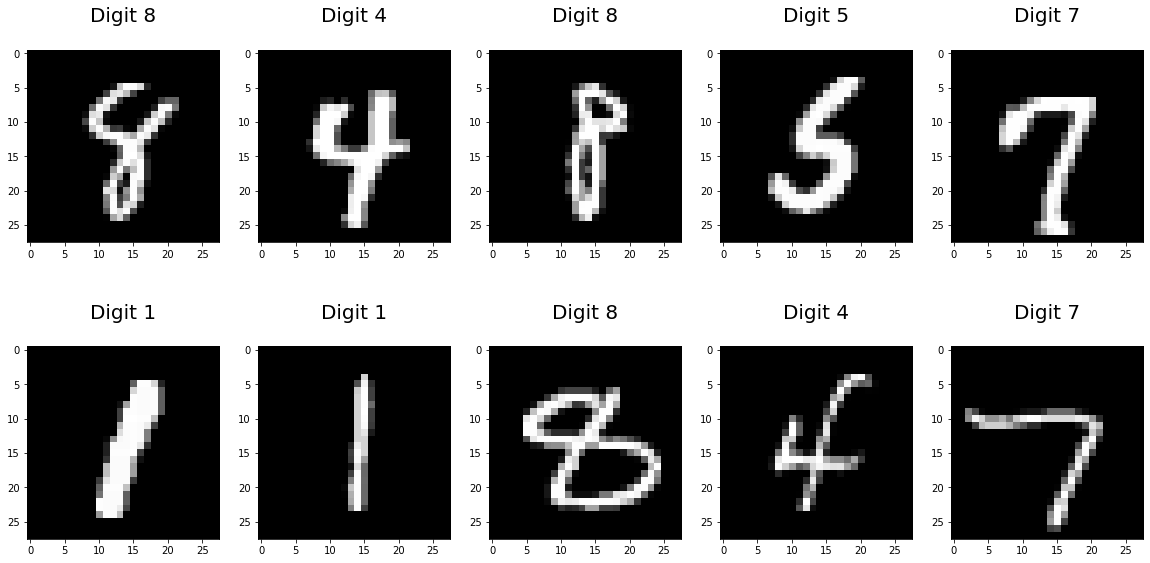

In [2]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,10))
for i in range(10,20):
    plt.subplot(2, 5, i-9)
    t = random.randint(0,70000)
    plt.imshow(np.reshape(images[t,:], (28,28)), cmap = plt.cm.gray)
    plt.title('Digit %i\n' %label[t], fontsize = 20)

### Sampling, Normalization and Data splitting

To make training faster, we only take 10% of the data randomly. Then we further reduce the dimension of the data by taking the average of each  Then we split the data into training and testing set and normalize them by max norm.

In [3]:
from sklearn.model_selection import train_test_split
X_new, X_unused, Y_new, Y_unused = train_test_split(images, label, test_size = 0.9, random_state = 1000)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 1000) # split the dataset into training and testing sets
X_trn = X_trn/256
X_tst = X_tst/256

### Image Rescaling
To make the training even faster. The next code block rescale all the images by reducing the height and width of the image both by half. We make each $2\times 2$ block in the orginal image into a single pixel in the new image. The resulting value of the pixels in the new image will be the average of the original four pixels.

Then we get new images with $14 \times 14$ in size and stores in the rows of X_trn_new and X_tst_new.

In [9]:
from skimage.transform import rescale, resize, downscale_local_mean
m, n = X_trn.shape
n_new = n//4
X_trn_new = np.zeros((m,n_new))
for i in range(m):
    image = np.reshape(X_trn[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_trn_new[i,:] = np.reshape(image_rescaled, n_new)

m2 = X_tst.shape[0]
X_tst_new = np.zeros((m2,n_new))
for i in range(m2):
    image = np.reshape(X_tst[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_tst_new[i,:] = np.reshape(image_rescaled, n_new)
    
print('The new training set has size: '+ str(X_trn_new.shape))
print('The new testing set has size: '+ str(X_tst_new.shape))

The new training set has size: (4900, 196)
The new testing set has size: (2100, 196)


## 1. Linear SVM
Run a linear SVM for the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with respect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?

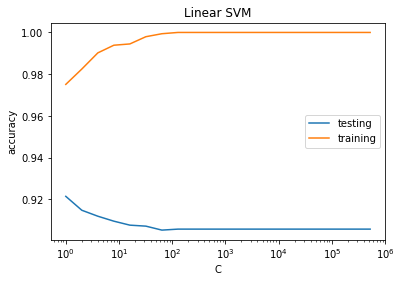

The maximum testing accuracy achieved with Linear SVM is: 0.9214285714285714


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
n = np.array(range(20))
c = 2**n
accuracy_tst = []
accuracy_trn = []
#========Your Code Here============

# When C is determined, use it in double SVM, find the alpha, use alpha to classify?
for i in c:
    clf1 = SVC(C=i, kernel='linear')
    clf1.fit(X_trn_new, Y_trn)
    accuracy_trn.append(accuracy_score(Y_trn, clf1.predict(X_trn_new)))
    accuracy_tst.append(accuracy_score(Y_tst, clf1.predict(X_tst_new)))
    
max_acc = max(accuracy_tst)  

#=============================
plt.semilogx(c, accuracy_tst, label = "testing")
plt.semilogx(c, accuracy_trn, label = "training")
plt.title("Linear SVM")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()
print('The maximum testing accuracy achieved with Linear SVM is: ' + str(max_acc))

When C is small, we can see the most accurate prediction throughout the different C used, which is around 0.92. As we increase the penalty parameter C, we can see that the training accuracy increases while the testing accuracy decreases. This shows that the increase in C, which means more penalty on misclassified data, makes the model more complex and predicts training data better, but decreases the testing accuracy, showing the overfitting phenomenon. Throughout the range of C, there is no value of C that would improve the testing accuracy, which may mean that there is no underfitting happening in this model.

This relationship of C and testing accuracy makes sense because the penalty parameter C has the inverse effects compared to the lambda we used for regularization.

The maximum testing accuracy for linear SVM is 0.921.

## 2. Polynomial SVM
Run an SVM with polynomial kernal of degree $2, 3, 4$ with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with respect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accuracy achieved among all penalty parameters for SVM with polynomial kernal of each degree? Compare it with linear SVM and explain.

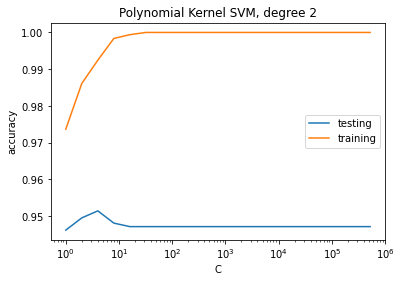

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2 is: 0.9514285714285714


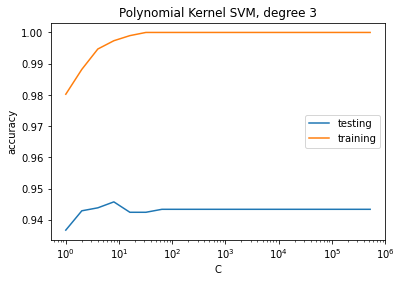

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 3 is: 0.9457142857142857


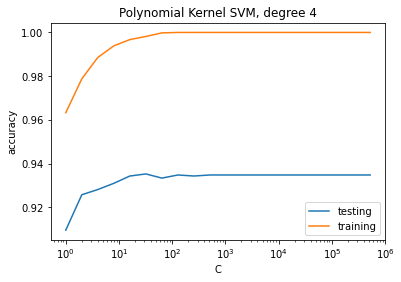

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 4 is: 0.9352380952380952


In [21]:
from sklearn.svm import SVC
D = [2, 3, 4]
n = np.array(range(20))
c = 2**n
max_acc = np.zeros(3)
for i in range(3):
    accuracy_tst = []
    accuracy_trn = []
    d = D[i]
    #========Your Code Here============

    for i in c:
        clf2 = SVC(C=i, kernel='poly', degree=d) # What is K equal to?
        clf2.fit(X_trn_new, Y_trn)
        accuracy_trn.append(accuracy_score(Y_trn, clf2.predict(X_trn_new)))
        accuracy_tst.append(accuracy_score(Y_tst, clf2.predict(X_tst_new)))
        
    max_acc = max(accuracy_tst)     

    #=============================
    plt.semilogx(c, accuracy_tst, label = "testing")
    plt.semilogx(c, accuracy_trn, label = "training")
    plt.title("Polynomial Kernel SVM, degree %i" %d)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    print('The maximum testing accuracy achieved with Polynomial Kernel SVM of degree ' + str(d) + ' is: ' + str(max_acc)) #removed the i

In the first plot on using polynomial kernel degree of 2, we can see that the model initially underfit when C is small. The training data prediction is poor (not 100%) and testing accuracy prediction is not at its best. As the C is increased to between 1 and 10, we can see the testing prediction improve to its maximum, and at the same time the training accuracy improves. But as we keep increasing the C to be bigger than 10, the testing prediction will decrease while the training accuracy continue improving closing to 100%. This shows that the model becomes overfitting.

In the second plot on using polynomial kernel degree of 3, we can see a similar behavior to the previous plot, where the model starts as being underfitting, but then becomes optimum at C between 1 and 10, and then overfitting as we increase the C to be bigger than 10. This means that we have to use the right C parameter value to get the optimum accuracy.

In the third plot on using polynomial kernel degree of 4, again we see a similar behavior. However, it is more difficult to see the overfitting phenomenon because the decrease of testing accuracy is less when compared to the previous plots. The best testing accuracy seemed to be between 10 and 100.

In the above plot, we can see the maximum testing accuracy achieved with Polynomial Kernel SVM for degree 2 to 4 (stated below each plot). The model that best predicts the testing data is the Polynomial SVM with degree of 2. We also compare the maximum testing accuracy achieved by using polynomial kernel compared to linear kernel, and using polynomial kernel shows to be better. This shows that using a polynomial kernel will provide a better prediction performance, and we should go with a degree of 2. This data set is quite complex, so it cannot be predicted well when only using a linear kernel.

## 3. SVM with Gaussian Kernel.
Run an SVM with Gaussian kernel with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with respect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal of each degree? Compare it with linear SVM and polynomial SVM and explain.

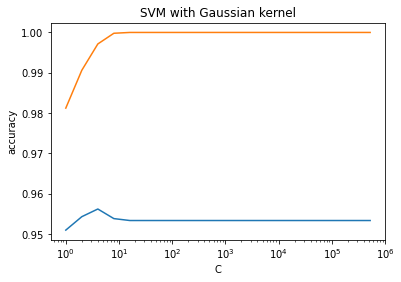

The maximum testing accuracy achieved with SVM with Gaussian kernel is: 0.9561904761904761


In [29]:
from sklearn.svm import SVC
accuracy_tst = []
accuracy_trn = []
n = np.array(range(20))
c = 2**n
#========Your Code Here============

for i in c:
    clf3 = SVC(C=i, kernel='rbf', gamma='scale') # gamma default or auto?????
    clf3.fit(X_trn_new, Y_trn)
    accuracy_trn.append(accuracy_score(Y_trn, clf3.predict(X_trn_new)))
    accuracy_tst.append(accuracy_score(Y_tst, clf3.predict(X_tst_new)))
    
max_acc = max(accuracy_tst) 

#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("SVM with Gaussian kernel")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with SVM with Gaussian kernel is: ' + str(max_acc))

Similar to the previous plots, we can see that the model initially underfit when C is small. The training data prediction is poor (not 100%) and testing accuracy prediction is not at its best. As the C is increased to between 1 and 10, we can see the testing prediction improve to its maximum, and at the same time the training accuracy improves. But as we keep increasing the C to be bigger than 10, the testing prediction will decrease while the training accuracy continue improving closing to 100%. This shows that the model becomes overfitting.

When using the Gaussian kernel, the maximum testing accuracy is 0.956. When compared to the other kernels (linear and polynomial), we can see that Gaussian kernel has the best performance. This means that Gaussian kernel would be best to predict the data, compared to other kernels tested

When using SVM, there are a lot of choices of kernel that we can use. We would have to do some experimentation to test which kernel would be the best to use.

What's interesting here is that we have learned that aside from using the Gaussian kernel, the next best classifier is the polynomial kernel with degree of 2. When we experimented with higher degrees, they proved to be too complex. However, when we are using a Gaussian kernel here, which is much more complex, it gave a better prediction. According to Zi Teng, it may be because the model gets too complex so it cannot be explained. This phenomenon has been proven with experiments (i.e in academia) but not with theorem. Another example is how a complex model like neural network can actually predict really well. Another possible reason for this phenomenon is that since Gaussian is an infinite function, it is not a strict polynomial (smoother), and so it is in a way less complex.